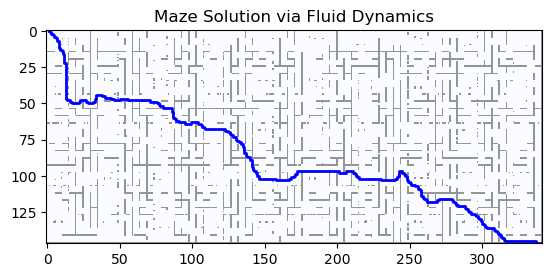

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import convolve

# Step 1: Preprocess the Maze Image
def preprocess_maze(image_path):
    # Load the maze image and convert it to a binary matrix
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_maze = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    binary_maze = binary_maze // 255  # Convert to 0 (walls) and 1 (paths)
    return binary_maze

# Detect entry and exit points dynamically
def find_entry_exit_points(maze):
    rows, cols = maze.shape

    entry_point = None
    exit_point = None

    # Entry point: First '1' found in top, bottom, left, or right borders
    for i in range(cols):
        if maze[0, i] == 1:  # Top row
            entry_point = (0, i)
            break
        if maze[rows-1, i] == 1:  # Bottom row
            entry_point = (rows-1, i)
            break

    if entry_point is None:  # If not found in rows, check columns
        for i in range(rows):
            if maze[i, 0] == 1:  # Left column
                entry_point = (i, 0)
                break
            if maze[i, cols-1] == 1:  # Right column
                entry_point = (i, cols-1)
                break

    # Exit point: Last '1' found in top, bottom, left, or right borders
    for i in range(cols-1, -1, -1):
        if maze[0, i] == 1:  # Top row
            exit_point = (0, i)
            break
        if maze[rows-1, i] == 1:  # Bottom row
            exit_point = (rows-1, i)
            break

    if exit_point is None:  # If not found in rows, check columns
        for i in range(rows-1, -1, -1):
            if maze[i, 0] == 1:  # Left column
                exit_point = (i, 0)
                break
            if maze[i, cols-1] == 1:  # Right column
                exit_point = (i, cols-1)
                break

    return entry_point, exit_point

# Step 2: Fluid Dynamics Simulation
def simulate_fluid_dynamics(maze, start, end):
    rows, cols = maze.shape
    fluid = np.zeros_like(maze, dtype=float)
    fluid[start] = 1  # Start point with initial fluid concentration

    kernel = np.array([[0.1, 0.1, 0.1],
                       [0.1, 0.2, 0.1],
                       [0.1, 0.1, 0.1]])

    path = []

    def in_bounds(r, c):
        return 0 <= r < rows and 0 <= c < cols

    for _ in range(500):  # Simulate for a fixed number of iterations
        fluid_next = convolve(fluid, kernel) * maze
        fluid_next[start] = 1  # Ensure the start point remains filled

        if fluid[end] > 0:
            # Trace the path back from the end point
            current = end
            while current != start:
                path.append(current)
                r, c = current
                neighbors = [(r+1, c), (r-1, c), (r, c+1), (r, c-1)]
                # Filter neighbors to ensure they're in bounds
                valid_neighbors = [n for n in neighbors if in_bounds(n[0], n[1])]
                current = max(valid_neighbors, key=lambda x: fluid[x])
            path.append(start)
            break

        fluid = fluid_next

    return fluid, path[::-1]

# Step 3: Visualization
def visualize_solution(maze, fluid_flow, path):
    plt.imshow(maze, cmap='gray', interpolation='none')
    plt.imshow(fluid_flow, cmap='Blues', alpha=0.6, interpolation='none')
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, color='blue', linewidth=2)
    plt.title("Maze Solution via Fluid Dynamics")
    plt.show()

# Full Solver Function
def solve_maze_with_fluid_dynamics(image_path):
    maze = preprocess_maze(image_path)
    
    # Dynamically find the entry and exit points
    start, end = find_entry_exit_points(maze)
    
    fluid_flow, path = simulate_fluid_dynamics(maze, start, end)
    visualize_solution(maze, fluid_flow, path)

# Example usage (to be run in your local environment):
solve_maze_with_fluid_dynamics(r'C:\Users\Devansh\Downloads\Python Projects\images.jpeg')
